In [1]:
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [2]:
mpl.style.use('seaborn')

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


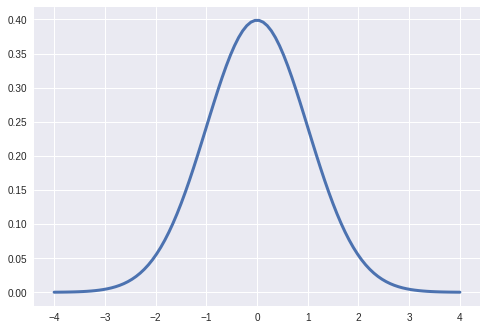

In [3]:
# Normal
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma), lw=3)
plt.savefig('densidad_normal.svg')


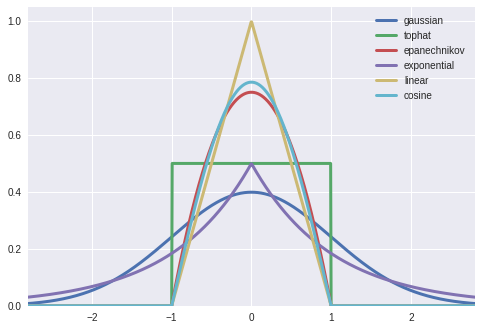

In [4]:
# Kernels
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(subplot_kw={#'axisbg':'#EEEEEE',
                                   'axisbelow':True})
X_src = np.zeros((1, 1))
x_grid = np.linspace(-3, 3, 1000)

for kernel in ['gaussian', 'tophat', 'epanechnikov',
               'exponential', 'linear', 'cosine']:
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
    ax.plot(x_grid, np.exp(log_dens), lw=3, label=kernel)
ax.set_ylim(0, 1.05)
ax.set_xlim(-2.8, 2.8)
ax.legend()
plt.savefig('kernels.svg')

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


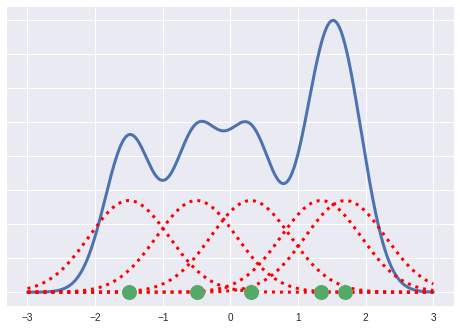

In [5]:
# Kernel density estimation
x_src = np.array([[-1.5],
                  [-0.5],
                  [0.3],
                  [1.34],
                  [1.7]])
fig, ax = plt.subplots(subplot_kw={#'axisbg':'#EEEEEE',
                                   'axisbelow':True})
x_grid = np.linspace(-3, 3, 1000)
bandwidth=0.35
log_dens = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(x_src).score_samples(x_grid[:, None])
ax.plot(x_grid, 5*np.exp(log_dens), lw = 3)

for point in x_src:
    sigma = math.sqrt(bandwidth)
    ax.plot(x_grid,mlab.normpdf(x_grid, point, sigma), lw=3, linestyle=':', color='red')
ax.plot(x_src, np.zeros(len(x_src)), marker='o', markersize=15, linewidth=0)
ax.set_yticklabels([])
plt.savefig('kde_example.svg')

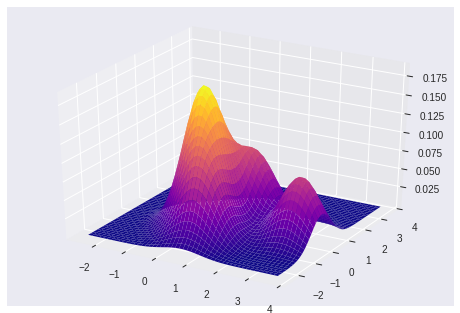

In [6]:
# Kernel density estimation 3D
import sklearn.neighbors.kde as sci_kde

x_src = np.array([[0,0],
                  [0,-0.3],
                  [0.6,-1.2],
                  [1.0,1.0],
                  [3.0,0]])
steps = 50
x_grid = np.linspace(-2.5, 3.7, steps)
y_grid = x_grid
X, Y = np.meshgrid(x_grid, y_grid)
XY_pairs = np.stack([ X.reshape(-1), Y.reshape(-1) ],axis=-1)
kde = sci_kde.KernelDensity(kernel='gaussian', bandwidth=0.6).fit(x_src)
Z = np.exp(kde.score_samples(XY_pairs))
fig = plt.figure()
Z = Z.reshape((steps, steps))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
plt.savefig('kde_3d_example.svg')